<a href="https://colab.research.google.com/github/cann-emma/myfork-linearRegression/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

In [70]:
! git clone https://github.com/cann-emma/myfork-linearRegression.git

fatal: destination path 'myfork-linearRegression' already exists and is not an empty directory.


**Q0.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?

    A model is called linear because the coefficients enter the prediction equation in a way that maintains a linear relationship between the predictor(x) and predicted values(y). This linearity means that changes in each x affect y in a straight-line manner, while holding other predictors constant.


2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)

    For a dummy variable, the coefficient shows the difference in the target variable when the feature is present (1) versus absent (0), compared to a reference category. The intercept gives the baseline outcome for the reference category, and each dummy coefficient measures change from this baseline.


3. Can linear regression be used for classification? Explain why, or why not.

    Linear regression can be used for classification when the target variable is coded as 0 or 1. The regression will produce continuous predictions between 0 and 1, which can then be used classify values into categories. This is known as logistic regression.

4. What are signs that your linear model is over-fitting?

    A model is overfit when too many variables exploit too many features of the training data. Signs of an overfitted model include high training but low testing accuracy and large model coefficients.

5. Clearly explain multi-colinearity using the two-stage least squares technique.

    Multicollinearity occurs when independent variables are highly correlated, making it difficult to estimate individual coefficients reliably. Using the 2 stage least squares technique, replace each collinear variable with a proxy variable, which is related to the problematic variables but not to the error. After this, use predicted values in the regression to remove the multicollinearity problem, as the proxy captures the shared information without making the coefficient estimates unstable. (Chat used here)



6. What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$?

    A polynomial family can be applied to the predictor varaible in the model, allowing the linear regression model to capture non-linear relationships.  Transformations like log, exponential, or square root can also be applied to variables to allow the model to accommodate non-linear relationship between predictors and predicted value.



7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

    The intercept is the value of the predicted value when all the predictors are 0. The slope coefficient reflects the change in y as x increases by a unit, assuming all other predictors are constant. The coefficient for a dummy variable represents the difference in y when the dummy variable is 1.

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented



1. Compute the average prices and scores by Neighbourhood; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by Neighbourhood.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
clean= pd.read_csv('/content/myfork-linearRegression/data/Q1_clean.csv')
print(clean.shape)
clean.head()

(22153, 5)


,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


In [73]:
clean[['Price','Review Scores Rating','Neighbourhood ']].groupby('Neighbourhood ')[['Price','Review Scores Rating']].mean()

,Price,Review Scores Rating
Neighbourhood,,
Bronx,75.276498,91.654378
Brooklyn,127.747378,92.363497
Manhattan,183.664286,91.801496
Queens,96.857233,91.549057
Staten Island,146.166667,90.843750


Manhattan is the most expensive on average

In [74]:
clean.isna().sum()

,0
Price,0
Review Scores Rating,0
Neighbourhood,0
Property Type,0
Room Type,0


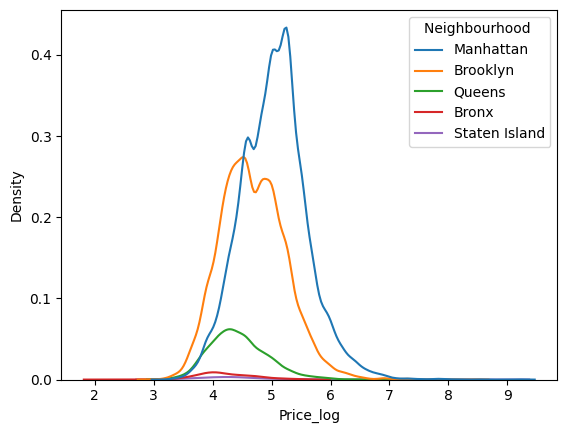

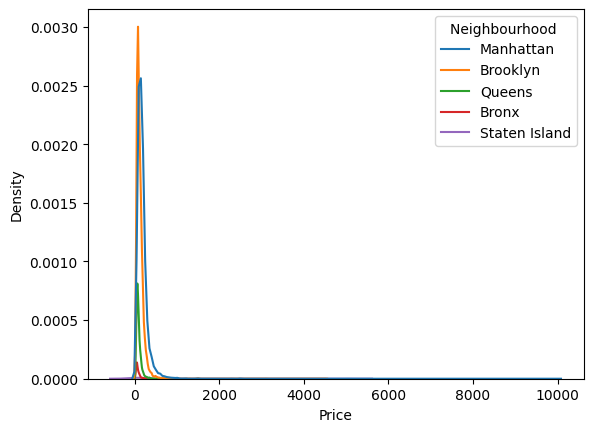

In [75]:
clean['Price_log']=np.log(clean['Price'])

sns.kdeplot(x= 'Price_log', data= clean, hue= 'Neighbourhood ')
plt.show()

sns.kdeplot(x= 'Price', data= clean, hue= 'Neighbourhood ')
plt.show()

2. Regress price on Neighbourhood by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [77]:
y= clean['Price']
X= pd.get_dummies(clean['Neighbourhood '], dtype= int)
model= linear_model.LinearRegression(fit_intercept= False).fit(X, y)

results= pd.DataFrame({'variable': model.feature_names_in_ ,'coefficient': model.coef_})
results


,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


The coefficient value for each Neighbourhood is its corresponding mean Price. Thus, coefficients in a regression of a continuous variable on one categorical variable is the average of the continuous variable for the categorical variable.

3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [78]:
# Leaving intercept without handling dummies
X= pd.get_dummies(clean['Neighbourhood '], dtype= int)
model= linear_model.LinearRegression(fit_intercept= True).fit(X, y)

results= pd.DataFrame({'variable': model.feature_names_in_ ,'coefficient': model.coef_})
results

,variable,coefficient
0,Bronx,-6.715775e+14
1,Brooklyn,-6.715775e+14
2,Manhattan,-6.715775e+14
3,Queens,-6.715775e+14
4,Staten Island,-6.715775e+14


In [79]:
# Including intercept and handling dummies
X= pd.get_dummies(clean['Neighbourhood '], dtype= int, drop_first= True)
model= linear_model.LinearRegression(fit_intercept= True).fit(X, y)

results= pd.DataFrame({'variable': model.feature_names_in_ ,'coefficient': model.coef_})
results

,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


In [80]:
model.intercept_
results= pd.DataFrame({'variable': model.feature_names_in_ ,'coefficient': model.coef_ + model.intercept_ })
results

,variable,coefficient
0,Brooklyn,127.747378
1,Manhattan,183.664286
2,Queens,96.857233
3,Staten Island,146.166667


The Coefficients are based on the reference first coefficient of the categorical value: Bronx(coef: 75.27649). To get the same coefficients in part 2, add the intercept value to the categorical value coefficients.

4. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood. What is the  R2  and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [88]:
y= clean['Price']
X= pd.concat([clean['Review Scores Rating'], pd.get_dummies(clean['Neighbourhood '], dtype= 'int')], axis= 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 100)

model1= linear_model.LinearRegression(fit_intercept= False).fit(X_train, y_train)
y_hat= model1.predict(X_test)

print('R2: ', model1.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat)))

results= pd.DataFrame({'variable': model1.feature_names_in_ ,'coefficient': model1.coef_})
results

R2:  0.06701086106947296
RMSE:  125.01092061382933


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


5. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood and Property Type. What is the  R2  and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [89]:
y= clean['Price']
X= pd.concat([clean['Review Scores Rating'], pd.get_dummies(clean['Neighbourhood '], dtype= 'int'), pd.get_dummies(clean['Property Type'], dtype= 'int')], axis= 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 100)
X_train.head()

model= linear_model.LinearRegression(fit_intercept= False).fit(X_train, y_train)
y_hat= model.predict(X_test)

print('R2: ', model.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat)))

results= pd.DataFrame({'variable': model.feature_names_in_ ,'coefficient': model.coef_})
results

R2:  0.07515316986819853
RMSE:  124.46423255231858


,variable,coefficient
0,Review Scores Rating,1.015839e+00
1,Bronx,-2.767276e+01
2,Brooklyn,2.924260e+01
3,Manhattan,9.174987e+01
4,Queens,-3.734207e-01
5,Staten Island,4.482572e+01
6,Apartment,-2.497177e+00
7,Bed & Breakfast,-3.382891e+01
8,Boat,6.445280e+01
9,Bungalow,5.126009e+01


In [90]:
y= clean['Price']
X= pd.concat([clean['Review Scores Rating'], pd.get_dummies(clean['Neighbourhood '], dtype= 'int'), pd.get_dummies(clean['Room Type'], dtype= 'int')], axis= 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 100)
X_train.head()

model= linear_model.LinearRegression(fit_intercept= False).fit(X_train, y_train)
y_hat= model.predict(X_test)

print('R2: ', model.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat)))

results= pd.DataFrame({'variable': model.feature_names_in_ ,'coefficient': model.coef_})
results

R2:  0.22035348129282306
RMSE:  114.27692123130633


,variable,coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


The most expensive property you can rent is a condominium, and the most expensive room is an entire home/apartment.

7. (Optional) We've included Neighborhood and Property Type separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus Review Scores Rating. How does the slope coefficient for Review Scores Rating, the  R2 , and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for Neighbourhood and Property Type from 5? What is the most expensive kind of property you can rent?

In [91]:
clean['Property_N']= clean['Property Type'].astype(str)+ ' in '+ clean['Neighbourhood '].astype(str)
y= clean['Price']
X= pd.concat([clean['Review Scores Rating'], pd.get_dummies(clean['Property_N'], dtype= 'int')], axis= 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 100)

model= linear_model.LinearRegression(fit_intercept= False).fit(X_train, y_train)
y_hat= model.predict(X_test)

print('R2: ', model.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat)))

results= pd.DataFrame({'variable': model.feature_names_in_ ,'coefficient': model.coef_})
results

R2:  0.08186343343357216
RMSE:  124.01188291277131


,variable,coefficient
0,Review Scores Rating,1.000849e+00
1,Apartment in Bronx,-1.296842e+01
2,Apartment in Brooklyn,3.116479e+01
3,Apartment in Manhattan,8.782965e+01
4,Apartment in Queens,7.437091e+00
5,Apartment in Staten Island,-4.839194e-01
6,Bed & Breakfast in Bronx,-3.508487e+01
7,Bed & Breakfast in Brooklyn,9.219870e-01
8,Bed & Breakfast in Manhattan,3.977591e+01
9,Bed & Breakfast in Queens,-1.384807e+01


In [93]:
## Test log transformed price

clean['Property_N']= clean['Property Type'].astype(str)+ ' in '+ clean['Neighbourhood '].astype(str)
y= clean['Price_log']
X= pd.concat([clean['Review Scores Rating'], pd.get_dummies(clean['Property_N'], dtype= 'int')], axis= 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 100)

model= linear_model.LinearRegression(fit_intercept= False).fit(X_train, y_train)
y_hat= model.predict(X_test)

print('R2: ', model.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat)))

results= pd.DataFrame({'variable': model.feature_names_in_ ,'coefficient': model.coef_})
results

R2:  0.14334154561320966
RMSE:  0.5501399946822592


,variable,coefficient
0,Review Scores Rating,7.709125e-03
1,Apartment in Bronx,3.542611e+00
2,Apartment in Brooklyn,3.970776e+00
3,Apartment in Manhattan,4.324739e+00
4,Apartment in Queens,3.785684e+00
5,Apartment in Staten Island,3.628055e+00
6,Bed & Breakfast in Bronx,3.403475e+00
7,Bed & Breakfast in Brooklyn,3.734066e+00
8,Bed & Breakfast in Manhattan,4.055156e+00
9,Bed & Breakfast in Queens,3.544805e+00


In [94]:
clean['RoomType_N']= clean['Room Type'].astype(str)+ ' in '+ clean['Neighbourhood '].astype(str)
y= clean['Price']
X= pd.concat([clean['Review Scores Rating'], pd.get_dummies(clean['RoomType_N'], dtype= 'int')], axis= 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 100)

model= linear_model.LinearRegression(fit_intercept= False).fit(X_train, y_train)
y_hat= model.predict(X_test)

print('R2: ', model.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat)))

results= pd.DataFrame({'variable': model.feature_names_in_ ,'coefficient': model.coef_})
results

R2:  0.2227250747073224
RMSE:  114.10298034724305


,variable,coefficient
0,Review Scores Rating,0.631849
1,Entire home/apt in Bronx,63.133021
2,Entire home/apt in Brooklyn,113.784926
3,Entire home/apt in Manhattan,169.494389
4,Entire home/apt in Queens,81.969775
5,Entire home/apt in Staten Island,234.958943
6,Private room in Bronx,3.736301
7,Private room in Brooklyn,20.579025
8,Private room in Manhattan,45.531833
9,Private room in Queens,11.532383


In [95]:
## Test log transformed price

clean['RoomType_N']= clean['Room Type'].astype(str)+ ' in '+ clean['Neighbourhood '].astype(str)
y= clean['Price_log']
X= pd.concat([clean['Review Scores Rating'], pd.get_dummies(clean['RoomType_N'], dtype= 'int')], axis= 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 100)

model= linear_model.LinearRegression(fit_intercept= False).fit(X_train, y_train)
y_hat= model.predict(X_test)

print('R2: ', model.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat)))

results= pd.DataFrame({'variable': model.feature_names_in_ ,'coefficient': model.coef_})
results

R2:  0.5216590131557313
RMSE:  0.4110911845385467


,variable,coefficient
0,Review Scores Rating,0.005156
1,Entire home/apt in Bronx,4.274825
2,Entire home/apt in Brooklyn,4.565426
3,Entire home/apt in Manhattan,4.826199
4,Entire home/apt in Queens,4.373205
5,Entire home/apt in Staten Island,4.440397
6,Private room in Bronx,3.596523
7,Private room in Brooklyn,3.832520
8,Private room in Manhattan,4.101866
9,Private room in Queens,3.719231


The R2 increased, RMSE decreased, and Review Scores rating slope coefficient decreased compared to part 5. The most expensive property is a loft in Manhattan, and the most expensive room type is an Entire home/apt in Staten Island

**Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
Split the sample into an ~80% training set and a ~20% test set.
Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
Which model performed the best, and why?
What did you learn?**

In [99]:
ls -al

total 348
drwxr-xr-x 1 root root   4096 Oct 29 02:11  ./
drwxr-xr-x 1 root root   4096 Oct 28 23:58  ../
drwxr-xr-x 4 root root   4096 Oct 25 13:20  .config/
-rw-r--r-- 1 root root 333442 Oct 29 02:11 'Life Expectancy Data.csv'
drwxr-xr-x 5 root root   4096 Oct 29 00:02  myfork-linearRegression/
drwxr-xr-x 1 root root   4096 Oct 25 13:20  sample_data/


In [111]:
life= pd.read_csv('Life Expectancy Data.csv')
print(life.shape)
life.head()

(2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [103]:
print(life.isna().sum())
print(life.dtypes)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64
Country                             object
Year                                 int64
Status                              object


In [105]:
life.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [106]:
life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [112]:
# Lifestyle, Education, Disease, Economy

life= life[['Country', 'Life expectancy ', 'Status','Alcohol', ' BMI ', 'GDP', 'Schooling']]
print(life.shape)
life.describe()

(2938, 7)


,Life expectancy,Alcohol,BMI,GDP,Schooling
count,2928.000000,2744.000000,2904.000000,2490.000000,2775.000000
mean,69.224932,4.602861,38.321247,7483.158469,11.992793
std,9.523867,4.052413,20.044034,14270.169342,3.358920
min,36.300000,0.010000,1.000000,1.681350,0.000000
25%,63.100000,0.877500,19.300000,463.935626,10.100000
50%,72.100000,3.755000,43.500000,1766.947595,12.300000
75%,75.700000,7.702500,56.200000,5910.806335,14.300000
max,89.000000,17.870000,87.300000,119172.741800,20.700000


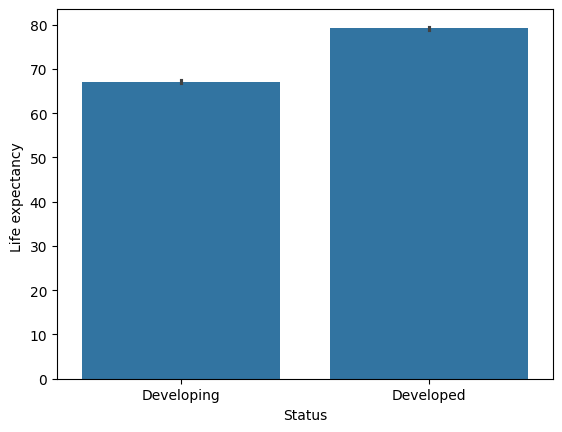

In [113]:
sns.barplot(x= 'Status', y= 'Life expectancy ', data= life)
plt.show()

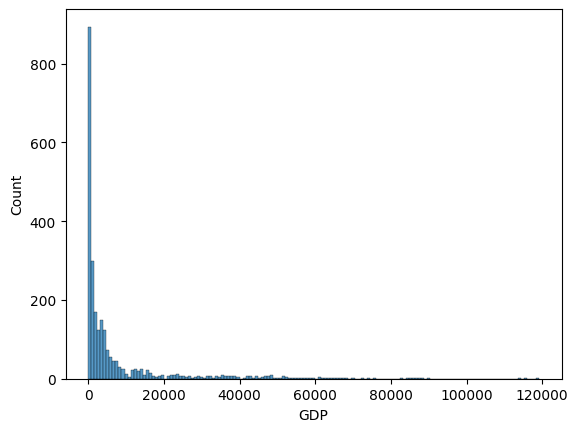

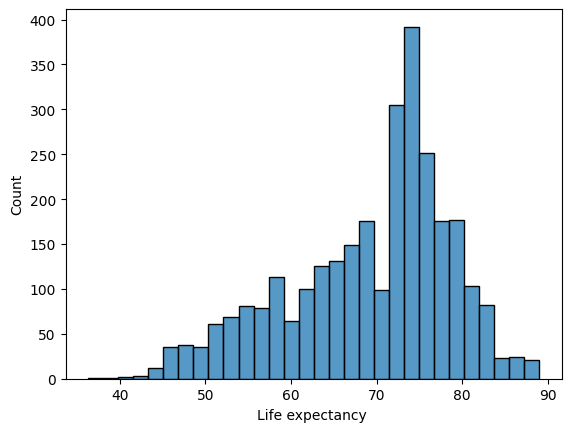

In [116]:
sns.histplot(life['GDP'])
plt.show()

sns.histplot(life['Life expectancy '])
plt.show()

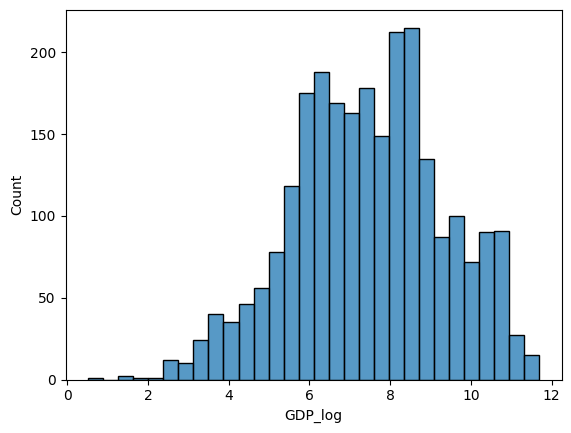

In [117]:
life['GDP_log']= np.log(life['GDP'])
sns.histplot(life['GDP_log'])
plt.show()

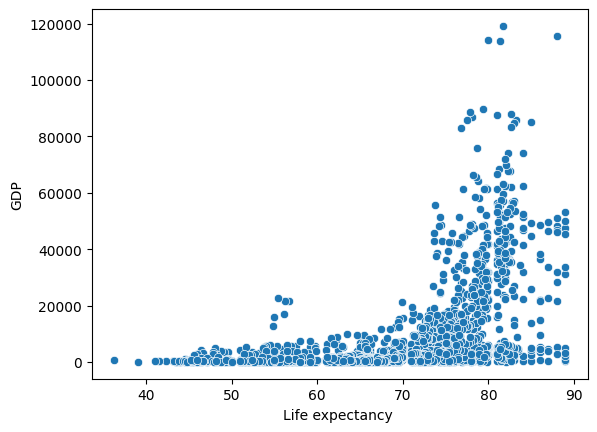

In [118]:
sns.scatterplot(x= 'Life expectancy ', y= 'GDP', data= life)
plt.show()

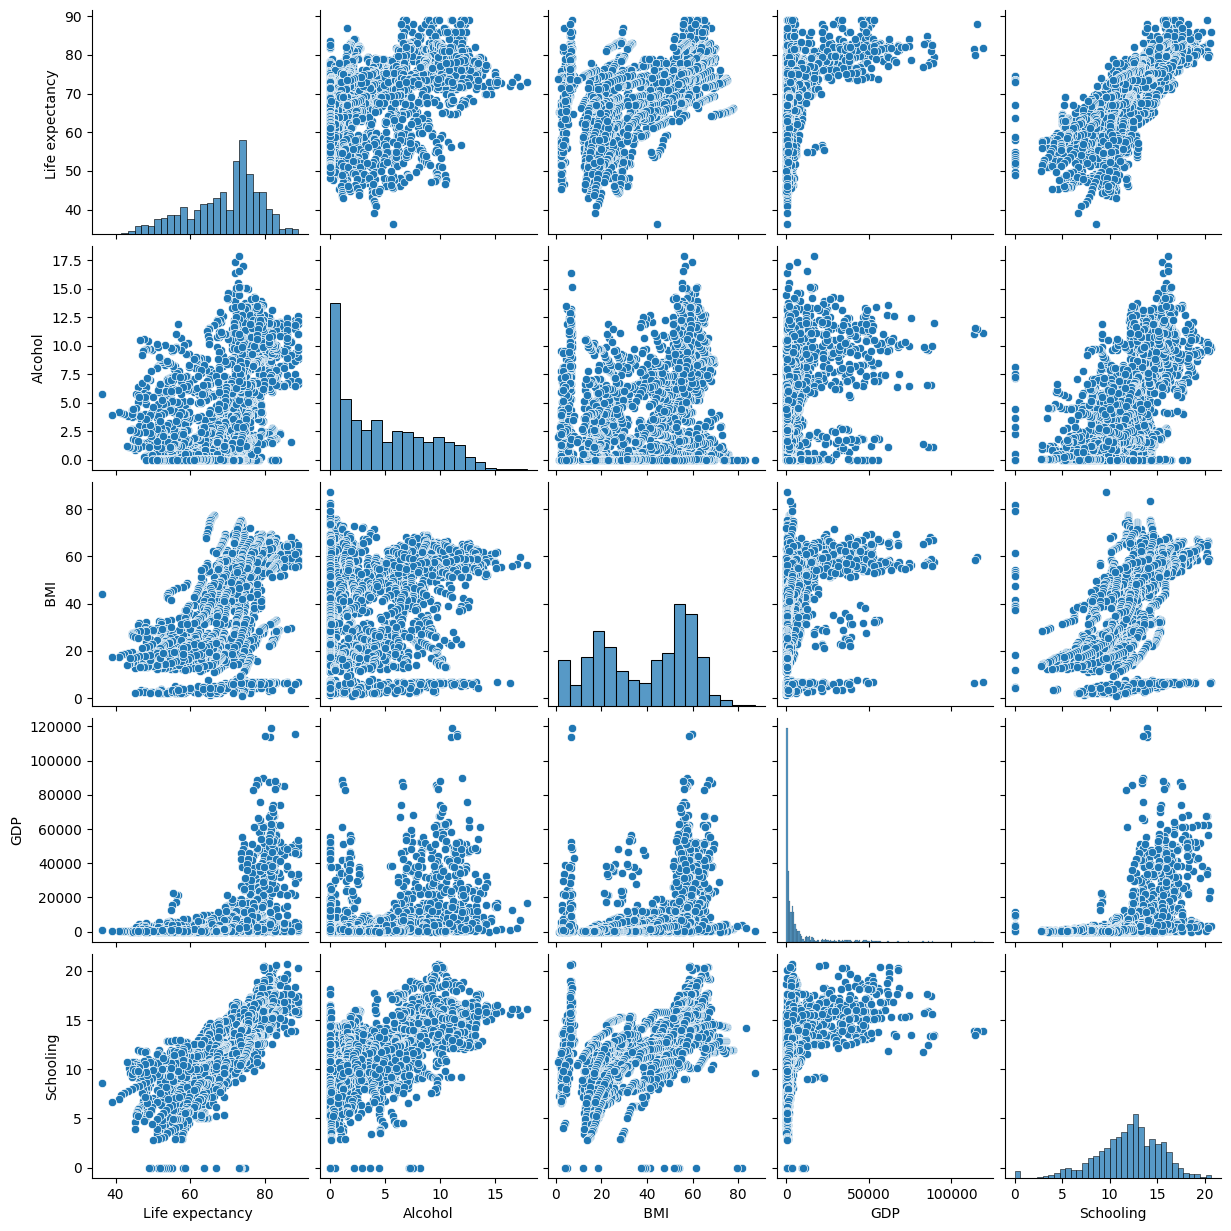

In [114]:
sns.pairplot(life)
plt.show()

In [120]:
life['GDP'].describe()

,GDP
count,2490.000000
mean,7483.158469
std,14270.169342
min,1.681350
25%,463.935626
50%,1766.947595
75%,5910.806335
max,119172.741800


In [123]:
life[['GDP', 'Country']].groupby('Country').mean()

,GDP
Country,
Afghanistan,340.015425
Albania,2119.726679
Algeria,2847.853392
Angola,1975.143045
Antigua and Barbuda,9759.305728
...,...
Venezuela (Bolivarian Republic of),NaN
Viet Nam,NaN
Yemen,NaN


In [124]:
life= life.dropna()

In [125]:
life.shape

(2311, 8)

In [126]:
life.isna().sum()

,0
Country,0
Life expectancy,0
Status,0
Alcohol,0
BMI,0
GDP,0
Schooling,0
GDP_log,0


In [134]:
# First look at variables like to predict life expectancy

y= life['Life expectancy ']
X= pd.concat([life['GDP'], life[' BMI '], pd.get_dummies(life['Status'], dtype= int)], axis= 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 100)

model= linear_model.LinearRegression(fit_intercept= False).fit(X_train, y_train)
y_hat= model.predict(X_test)

print('Test R2: ', model.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat)))

print('Train R2: ', model.score(X_train, y_train))

results= pd.DataFrame({'variable': model.feature_names_in_ ,'coefficient': model.coef_})
results

Test R2:  0.4650417015790771
RMSE:  6.951676421884826
Train R2:  0.4764499395014197


,variable,coefficient
0,GDP,0.000142
1,BMI,0.219083
2,Developed,64.877413
3,Developing,58.777742


In [135]:
life_num= life[['Life expectancy ', 'Alcohol', ' BMI ', 'GDP', 'Schooling']]
life_num.corr()

,Life expectancy,Alcohol,BMI,GDP,Schooling
Life expectancy,1.000000,0.383569,0.581129,0.461824,0.750721
Alcohol,0.383569,1.000000,0.345160,0.352890,0.556322
BMI,0.581129,0.345160,1.000000,0.301899,0.570406
GDP,0.461824,0.352890,0.301899,1.000000,0.452680
Schooling,0.750721,0.556322,0.570406,0.452680,1.000000


In [131]:
# Exclude variables likely to be correlated to other predictor varaibles. GDP is related to Status
y= life['Life expectancy ']
X= pd.concat([life['GDP'], life['Schooling'], life[' BMI '], life['Alcohol'], pd.get_dummies(life['Country'], dtype= 'int')], axis= 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 100)

model= linear_model.LinearRegression(fit_intercept= False).fit(X_train, y_train)
y_hat= model.predict(X_test)

print('Test R2: ', model.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat)))

print('Train R2: ', model.score(X_train, y_train))

results= pd.DataFrame({'variable': model.feature_names_in_ ,'coefficient': model.coef_})
results

Test R2:  0.9202531986622265
RMSE:  2.684022923587445
Train R2:  0.9493453526740887


,variable,coefficient
0,GDP,0.000017
1,Schooling,0.758797
2,BMI,0.004723
3,Alcohol,-0.323417
4,Afghanistan,51.887616
...,...,...
154,Uruguay,66.101629
155,Uzbekistan,59.450022
156,Vanuatu,63.093640
157,Zambia,46.355224


In [132]:
# But What if we include Status?

y= life['Life expectancy ']
X= pd.concat([life['GDP'], life['Schooling'], life[' BMI '], life['Alcohol'], pd.get_dummies(life['Country'], dtype= 'int'), pd.get_dummies(life['Status'], dtype= 'int')], axis= 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 100)

model= linear_model.LinearRegression(fit_intercept= False).fit(X_train, y_train)
y_hat= model.predict(X_test)

print('Test R2: ', model.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat)))

print('Train R2: ', model.score(X_train, y_train))

results= pd.DataFrame({'variable': model.feature_names_in_ ,'coefficient': model.coef_})
results


## No major changes when status was added

Test R2:  0.9202531992651666
RMSE:  2.6840229134409266
Train R2:  0.9493453526741399


,variable,coefficient
0,GDP,1.726216e-05
1,Schooling,7.587974e-01
2,BMI,4.722676e-03
3,Alcohol,-3.234171e-01
4,Afghanistan,4.243934e+07
...,...,...
156,Vanuatu,4.243935e+07
157,Zambia,4.243933e+07
158,Zimbabwe,4.243933e+07
159,Developed,-4.098459e+07


In [144]:
# Including transformations

y= life['Life expectancy ']
X= pd.concat([life['GDP_log'], life['Schooling'], life[' BMI '], life['Alcohol'], pd.get_dummies(life['Country'], dtype= 'int'), pd.get_dummies(life['Status'], dtype= 'int')], axis= 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 100)

model= linear_model.LinearRegression(fit_intercept= False).fit(X_train, y_train)
y_hat= model.predict(X_test)

print('Test R2: ', model.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat)))

print('Train R2: ', model.score(X_train, y_train))

results= pd.DataFrame({'variable': model.feature_names_in_ ,'coefficient': model.coef_})
results

## Log transformation of GDP increases R2

Test R2:  0.9212802371879962
RMSE:  2.666683495012446
Train R2:  0.94946896797396


,variable,coefficient
0,GDP_log,1.580423e-01
1,Schooling,7.409403e-01
2,BMI,4.415351e-03
3,Alcohol,-3.257392e-01
4,Afghanistan,-4.592827e+10
...,...,...
156,Vanuatu,-4.592827e+10
157,Zambia,-4.592827e+10
158,Zimbabwe,-4.592827e+10
159,Developed,4.656238e+10


In [145]:
sse = np.sum((y_test - y_hat) ** 2)
print('SSE:', sse)

SSE: 3292.4859993707414


In [139]:
# Including interactions

life['Country_Stat']= life['Country'].astype(str)+ '-'+ life['Status'].astype(str)
y= life['Life expectancy ']
X= pd.concat([life['GDP_log'], life['Schooling'], life[' BMI '], life['Alcohol'], pd.get_dummies(life['Country_Stat'], dtype= 'int')], axis= 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 100)

model= linear_model.LinearRegression(fit_intercept= False).fit(X_train, y_train)
y_hat= model.predict(X_test)

print('Test R2: ', model.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat)))

print('Train R2: ', model.score(X_train, y_train))

results= pd.DataFrame({'variable': model.feature_names_in_ ,'coefficient': model.coef_})
results

# interaction did not have much of an effect

Test R2:  0.9212797994900205
RMSE:  2.6666909086548625
Train R2:  0.9494689650826448


<ipython-input-139-e97cb9053cfb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life['Country_Stat']= life['Country'].astype(str)+ '-'+ life['Status'].astype(str)


,variable,coefficient
0,GDP_log,0.158035
1,Schooling,0.740949
2,BMI,0.004413
3,Alcohol,-0.325734
4,Afghanistan-Developing,51.171666
...,...,...
154,Uruguay-Developing,65.248085
155,Uzbekistan-Developing,58.709854
156,Vanuatu-Developing,62.175818
157,Zambia-Developing,45.637167


The model with relatively 'more' relevant predictors and a transformation performed better. I learnt that 92.12% of life expectancy in our data can be explained by 4 variables: GDP, BMI, schooling, country, and development status.